In [ ]:
import json
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect with the Database.
try:
    conn = sqlite3.connect('household_demand.db')
except sqlite3.Error as e:
    print(f"Error de conexión: {e}")
    exit()

# Load the data from the JSON file and store it in the database.
try: 
    data = pd.read_json('ESRI Structural Household Demand by Local Authority.json')
except FileNotFoundError:
    print("File not found")
    exit()

# Store the data in the database.
data.to_sql('household_demand_data', conn, if_exists='replace', index=False)

# Close the connection.
print("Data loaded and stored in SQLite database")

Data loaded and stored in SQLite database


In [58]:
# Calculate the average and variance of the demand for each Local Authority and Scenario.
columns_to_convert = [col for col in data.columns if 'year_' in col]
data[columns_to_convert] = data[columns_to_convert].replace(',', '', regex=True).astype(int)

# Calculate the average and variance of the demand for each Local Authority and Scenario.
data['avarege_demand'] = data[columns_to_convert].mean(axis=1)
data['variance_demand'] = data[columns_to_convert].var(axis=1)

# Store the summary in the database.
summary = data.groupby(['Local Authority', 'Scenario'])[['avarege_demand', 'variance_demand']].mean().reset_index()

# Store the summary in the database.
summary.to_sql('summary_statics', conn, if_exists='replace', index=False)

# Close the connection.
print("Statistics calculated and stored in SQLite database")
print("Data Head")
print(data.head())
print("\nSummary Head")
print(summary.head())

conn.close()

Statistics calculated and stored in SQLite database
Data Head
  Local Authority        Scenario  year_2020  year_2021  year_2022  year_2023  \
0          Carlow        Baseline        409        395        382        401   
1           Cavan        Baseline        462        451        446        474   
2       Cork City        Baseline       1544       1560       1485       1467   
3       Cork City  High migration       1530       1589       1559       1588   
4           Clare        Baseline        623        591        580        596   

   year_2024  year_2025  year_2026  year_2027  ...  year_2033  year_2034  \
0        399        414        398        390  ...        423        402   
1        490        472        454        471  ...        527        528   
2       1408       1356       1390       1386  ...       1394       1364   
3       1579       1579       1624       1631  ...       1691       1669   
4        599        592        567        576  ...        592        56

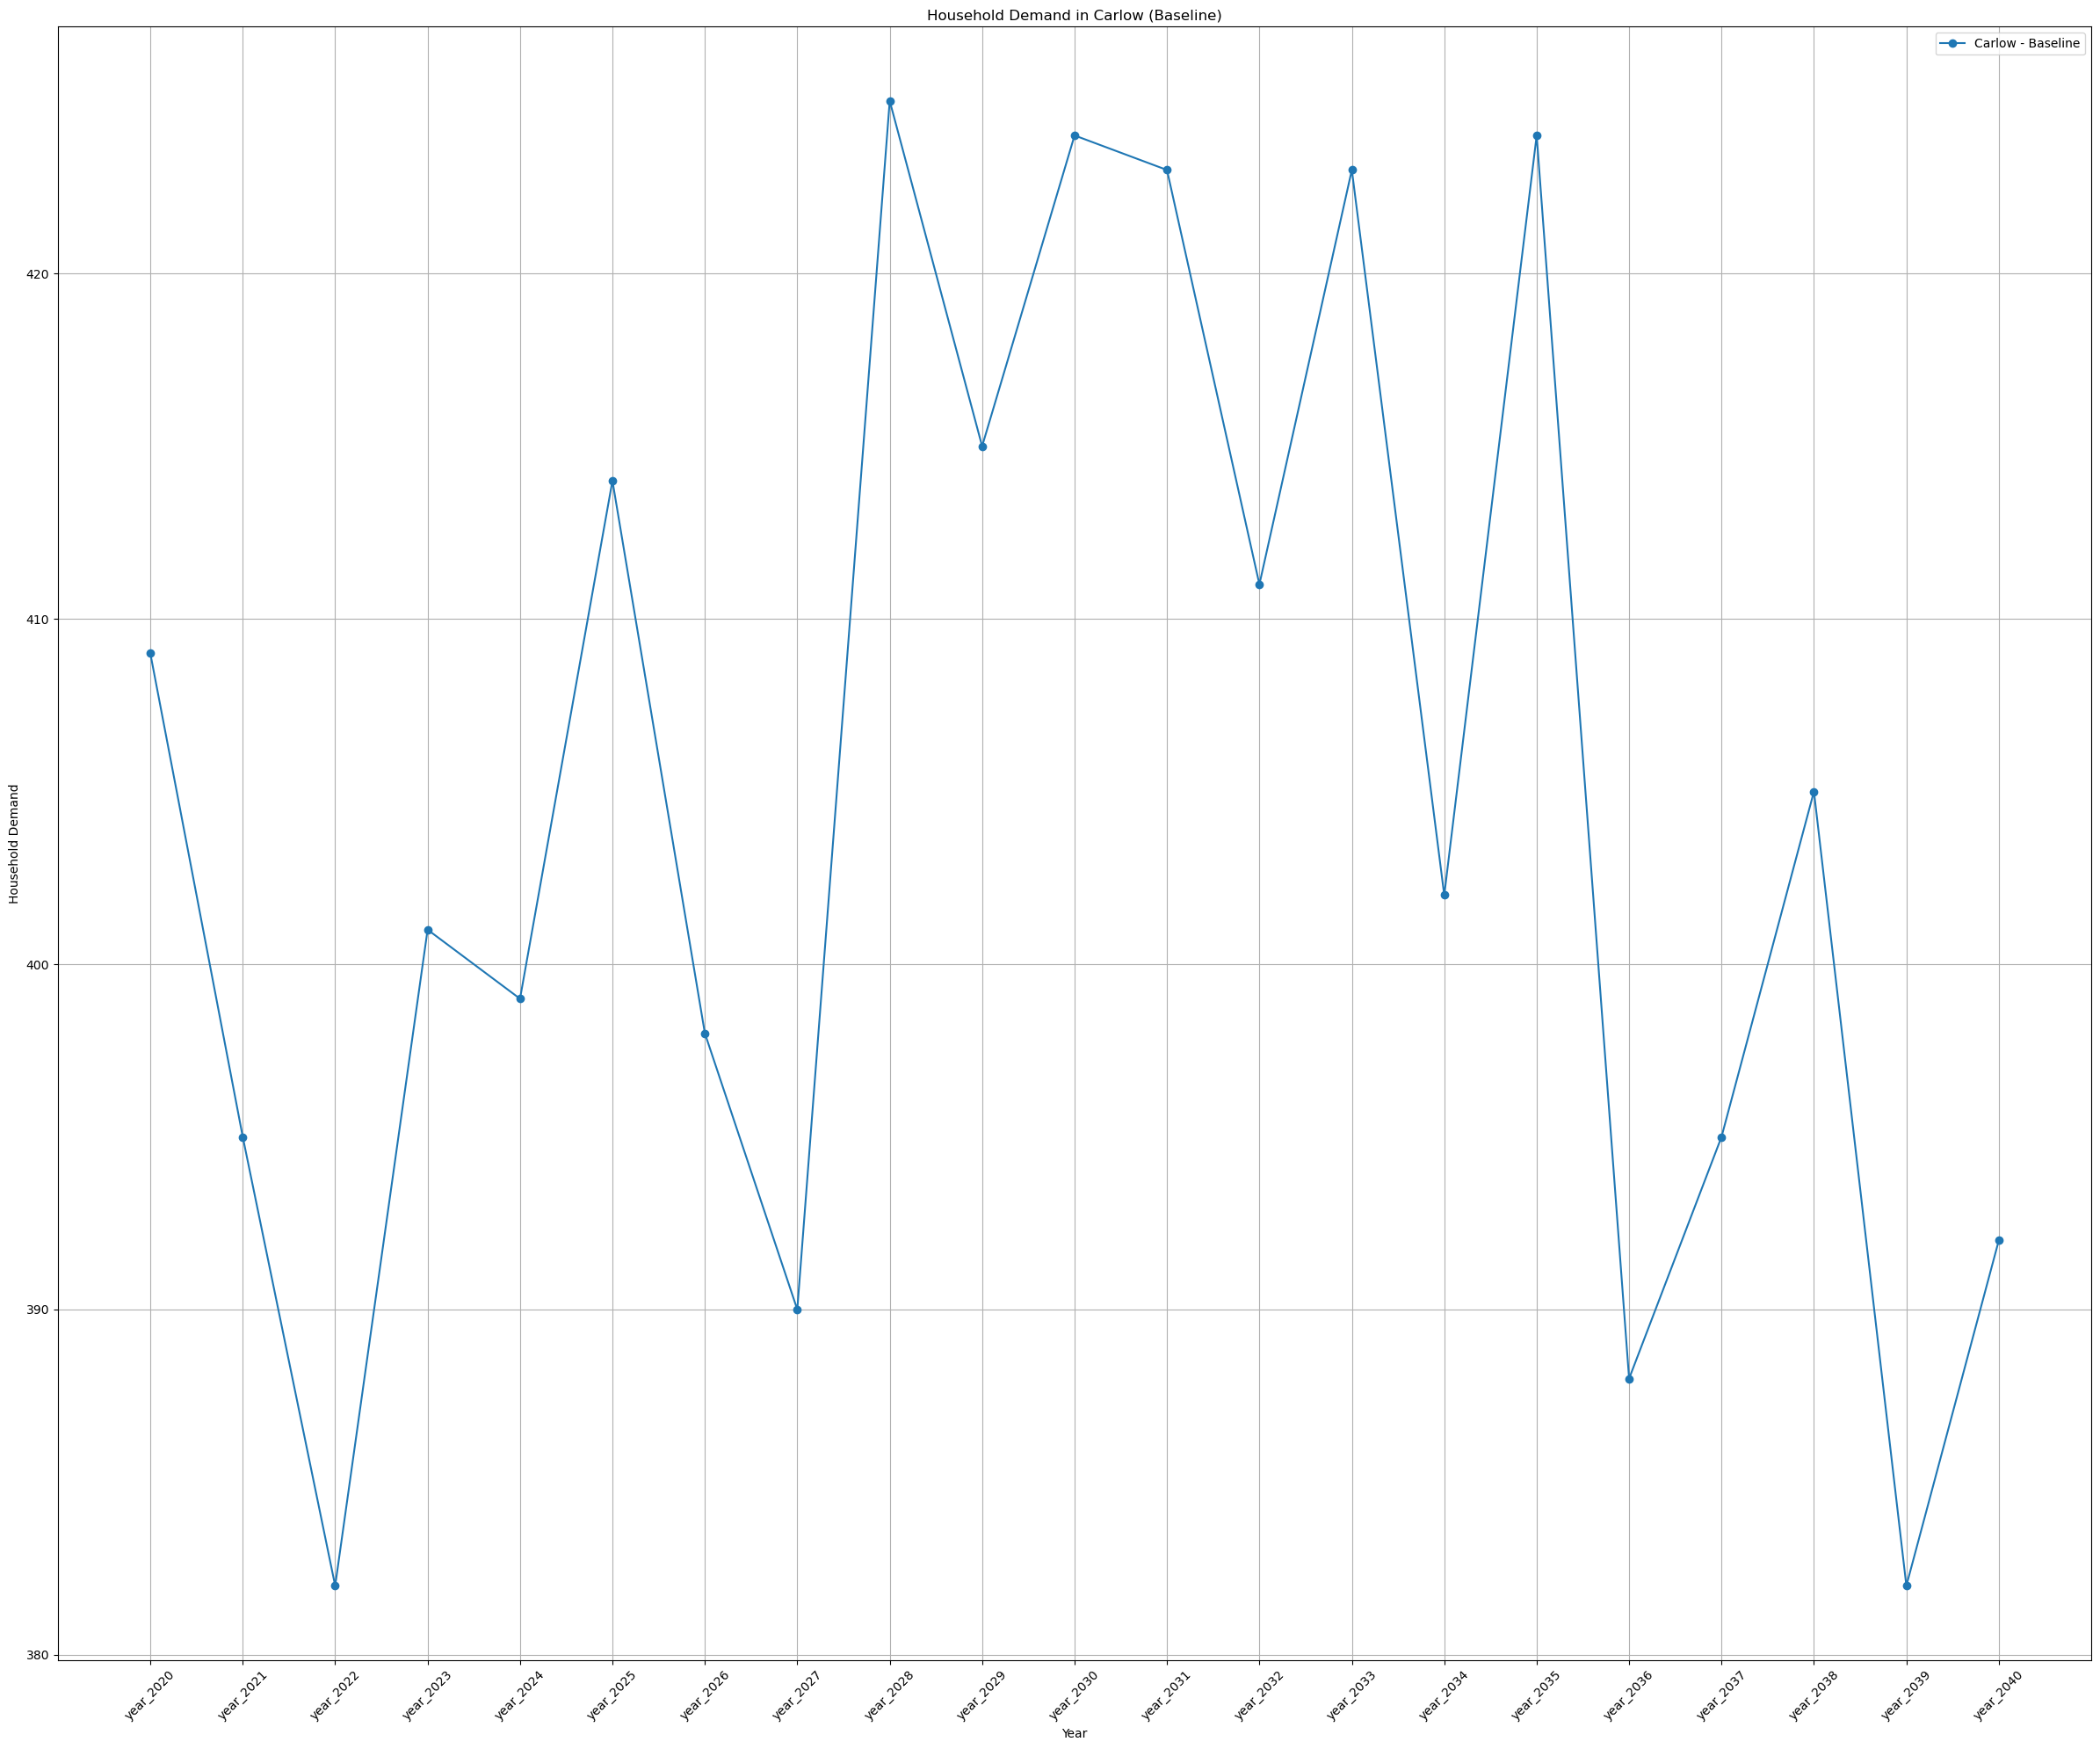

In [66]:
# Plot the demand for each Carlow and Baseline.
chart_data = data[(data['Local Authority'] == 'Carlow') & (data['Scenario'] == 'Baseline')]

plt.figure(figsize=(24, 20))
plt.plot(columns_to_convert, chart_data[columns_to_convert].iloc[0], marker='o', label='Carlow - Baseline')
plt.title('Household Demand in Carlow (Baseline)')
plt.xlabel('Year')
plt.ylabel('Household Demand')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

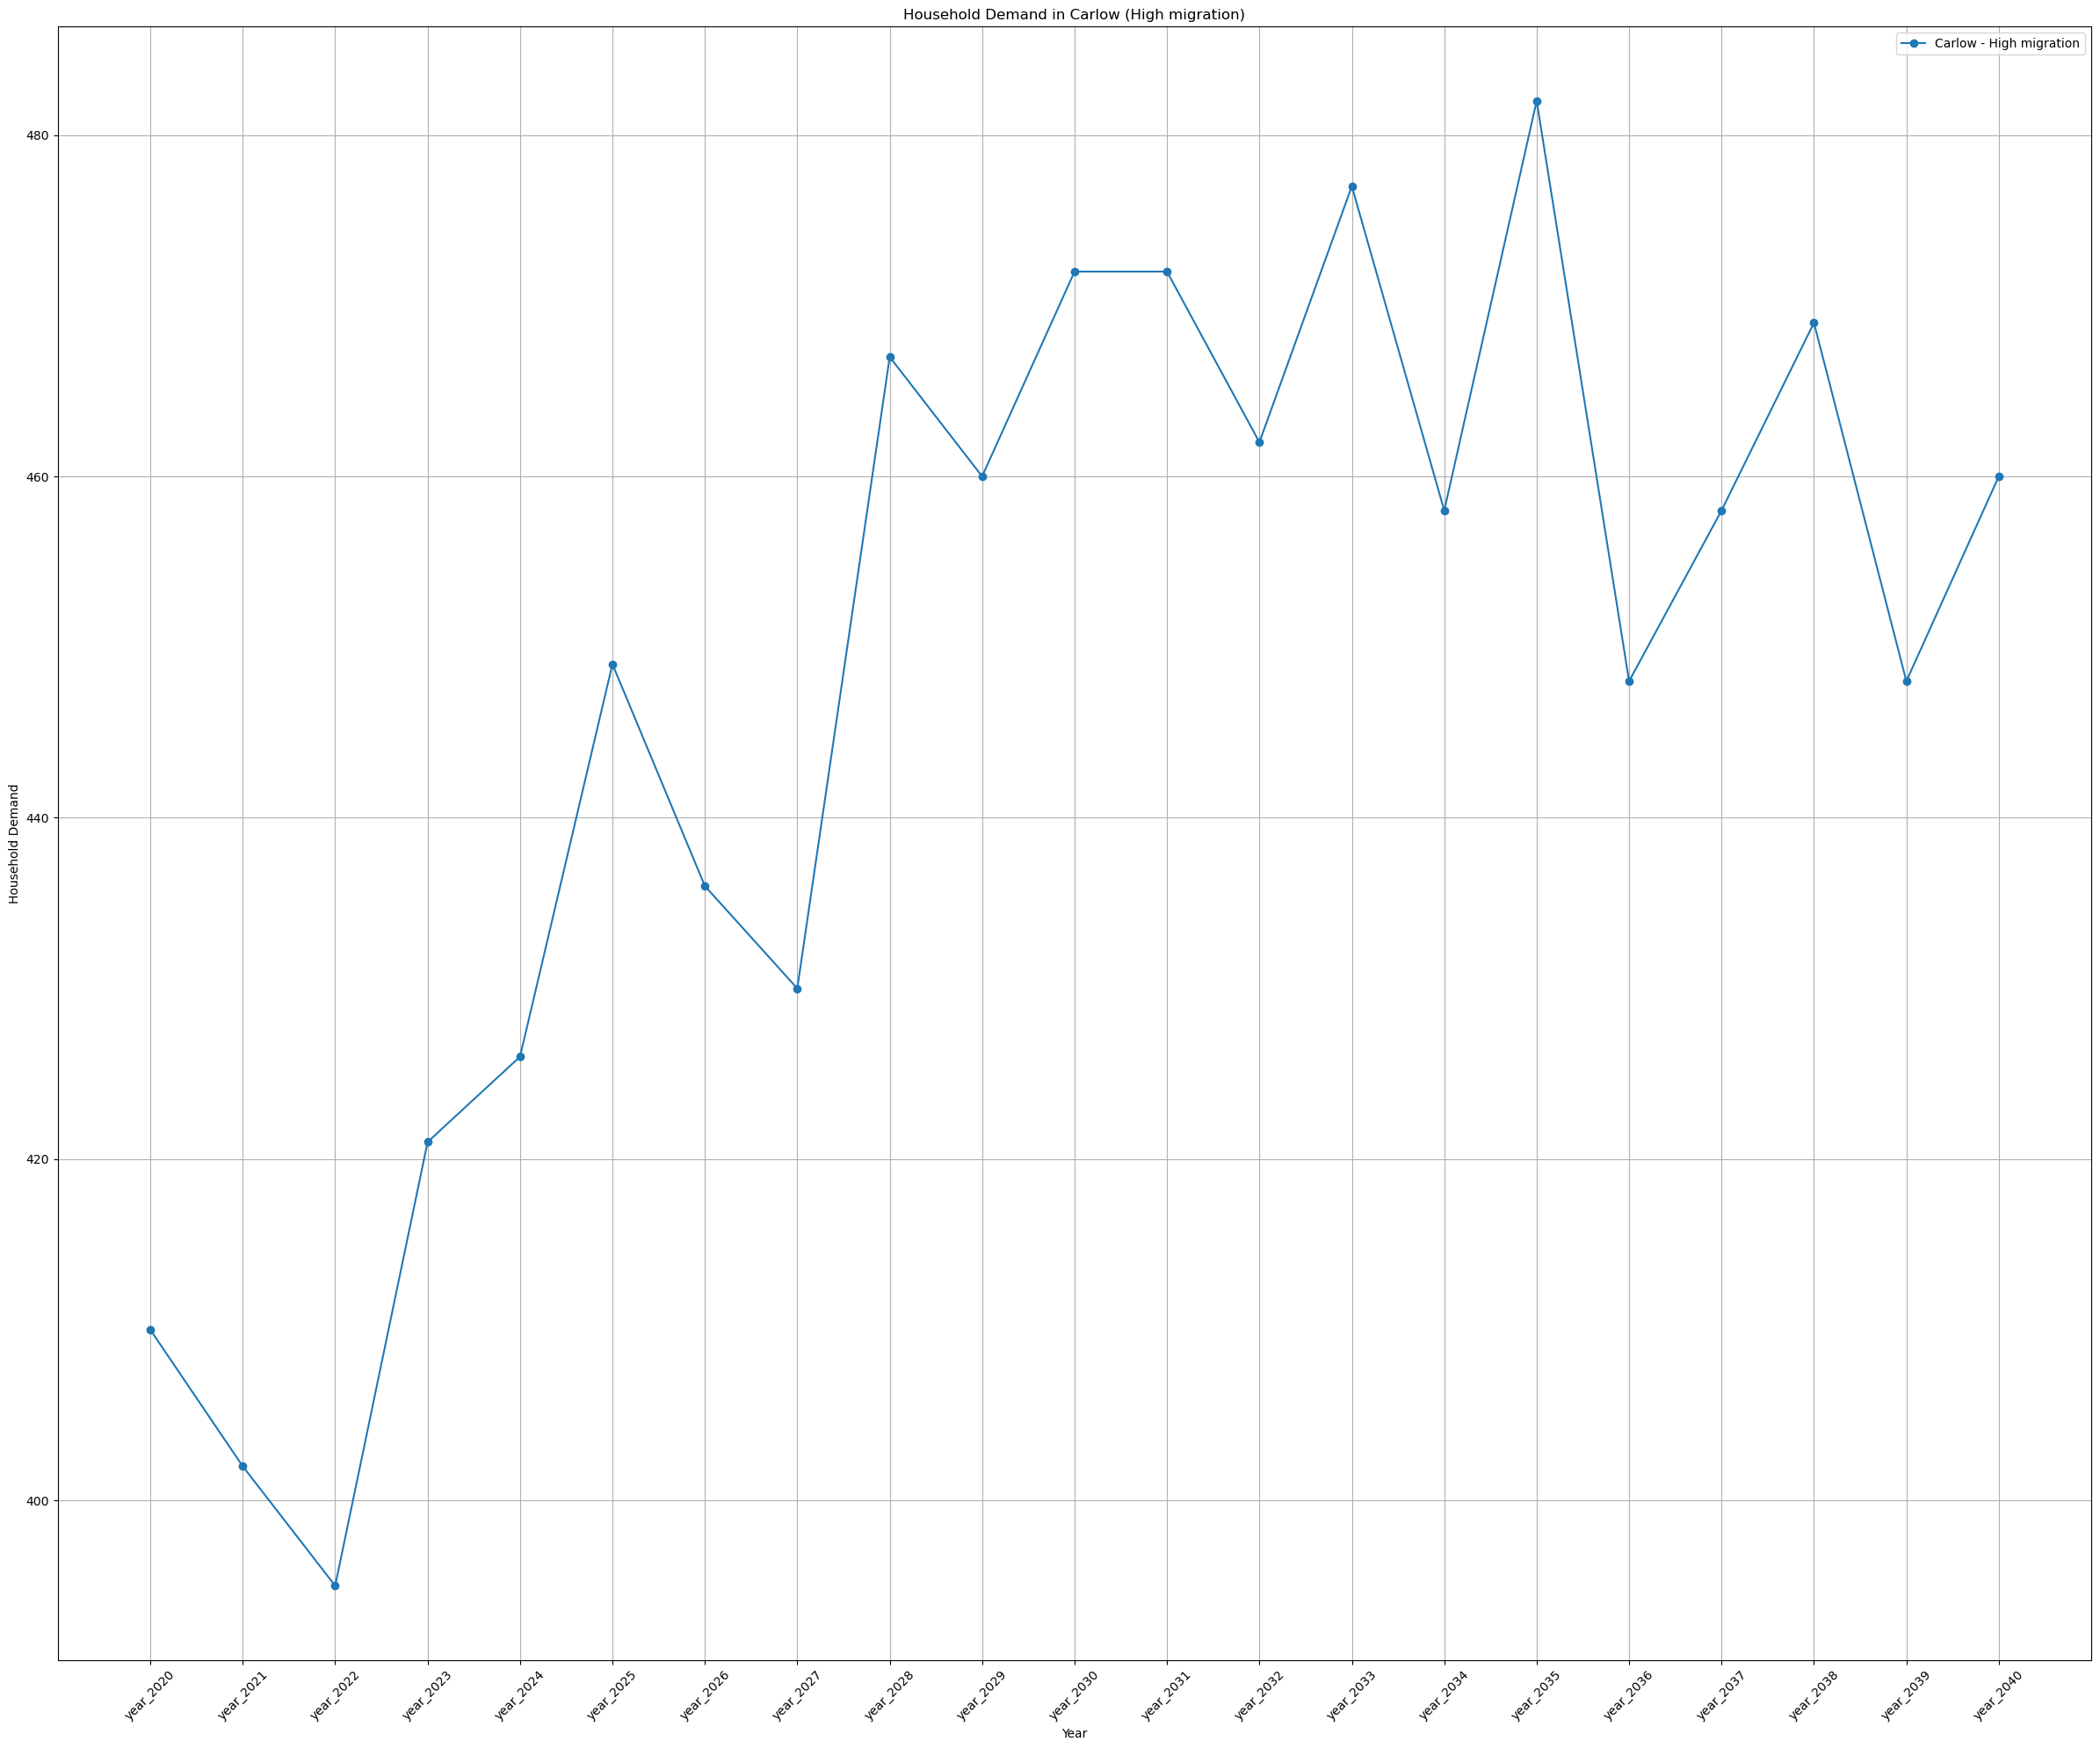

In [71]:
# Plot the demand for each Carlow and Baseline.
chart_data = data[(data['Local Authority'] == 'Carlow') & (data['Scenario'] == 'High migration')]

plt.figure(figsize=(24, 20))
plt.plot(columns_to_convert, chart_data[columns_to_convert].iloc[0], marker='o', label='Carlow - High migration')
plt.title('Household Demand in Carlow (High migration)')
plt.xlabel('Year')
plt.ylabel('Household Demand')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

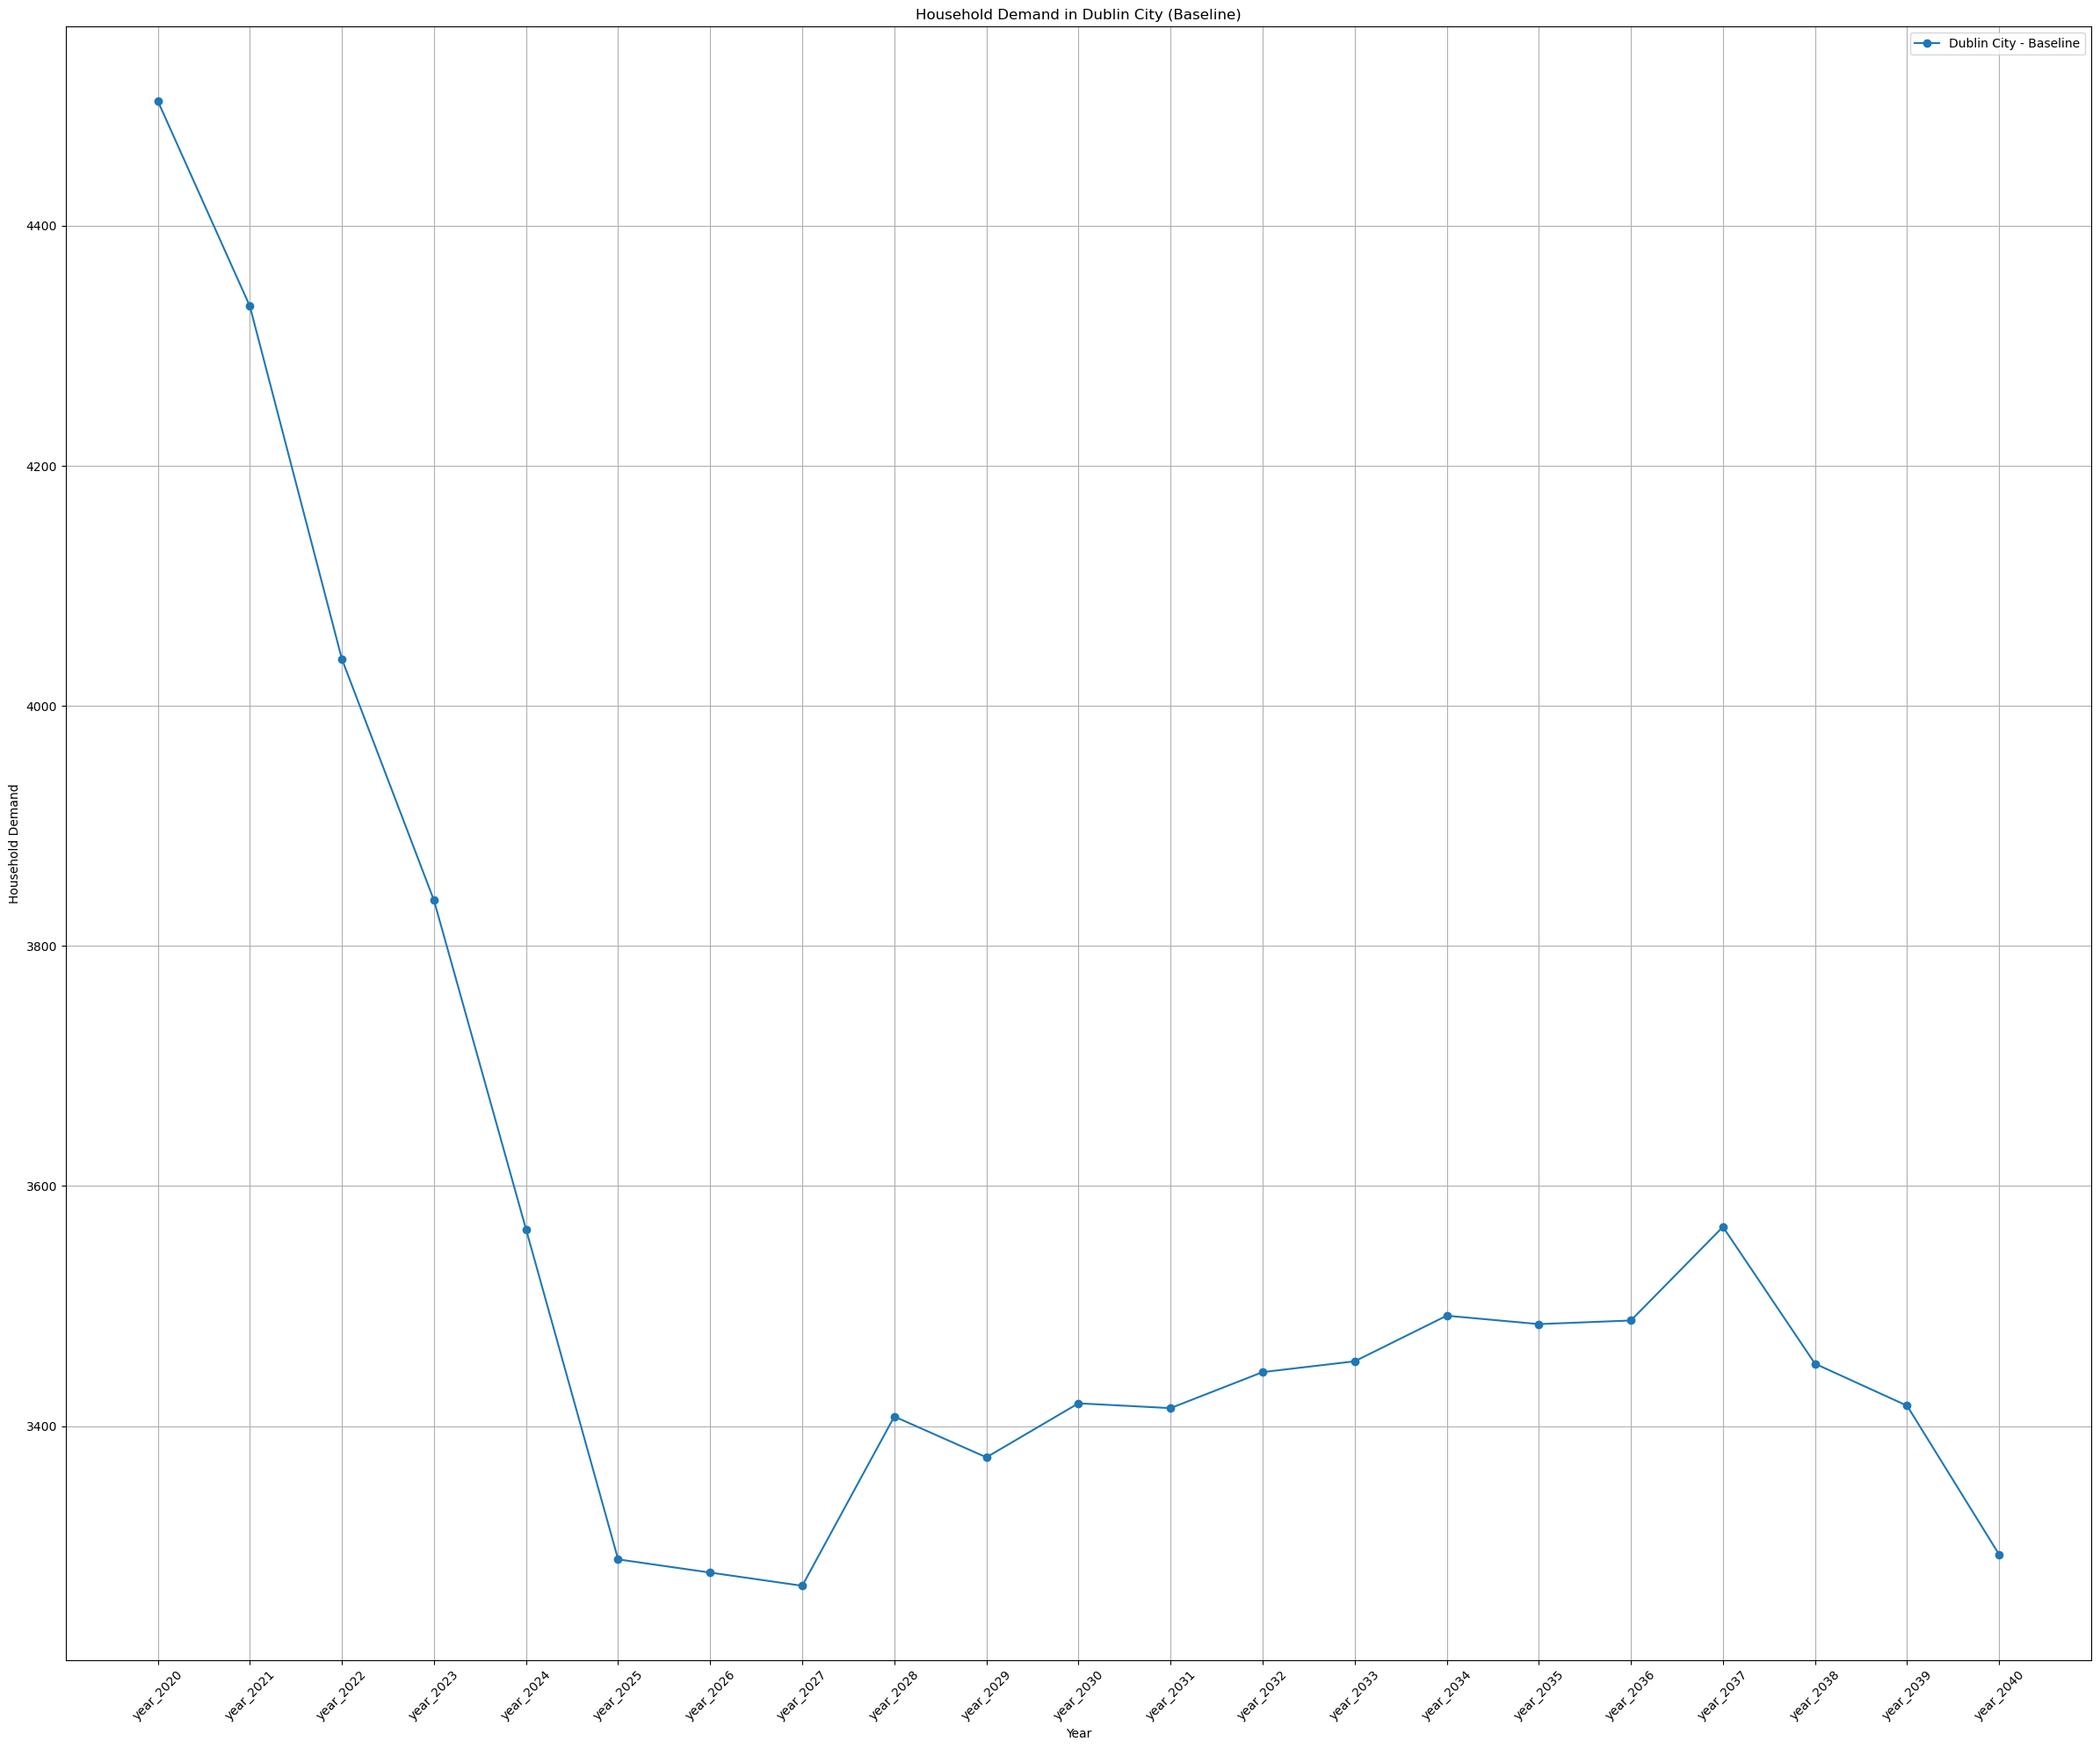

In [ ]:
# Plot the demand for each Dublin City and Baseline.
chart_data = data[(data['Local Authority'] == 'Dublin City') & (data['Scenario'] == 'Baseline')]

plt.figure(figsize=(24, 20))
plt.plot(columns_to_convert, chart_data[columns_to_convert].iloc[0], marker='o', label='Dublin City - Baseline')
plt.title('Household Demand in Dublin City (Baseline)')
plt.xlabel('Year')
plt.ylabel('Household Demand')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

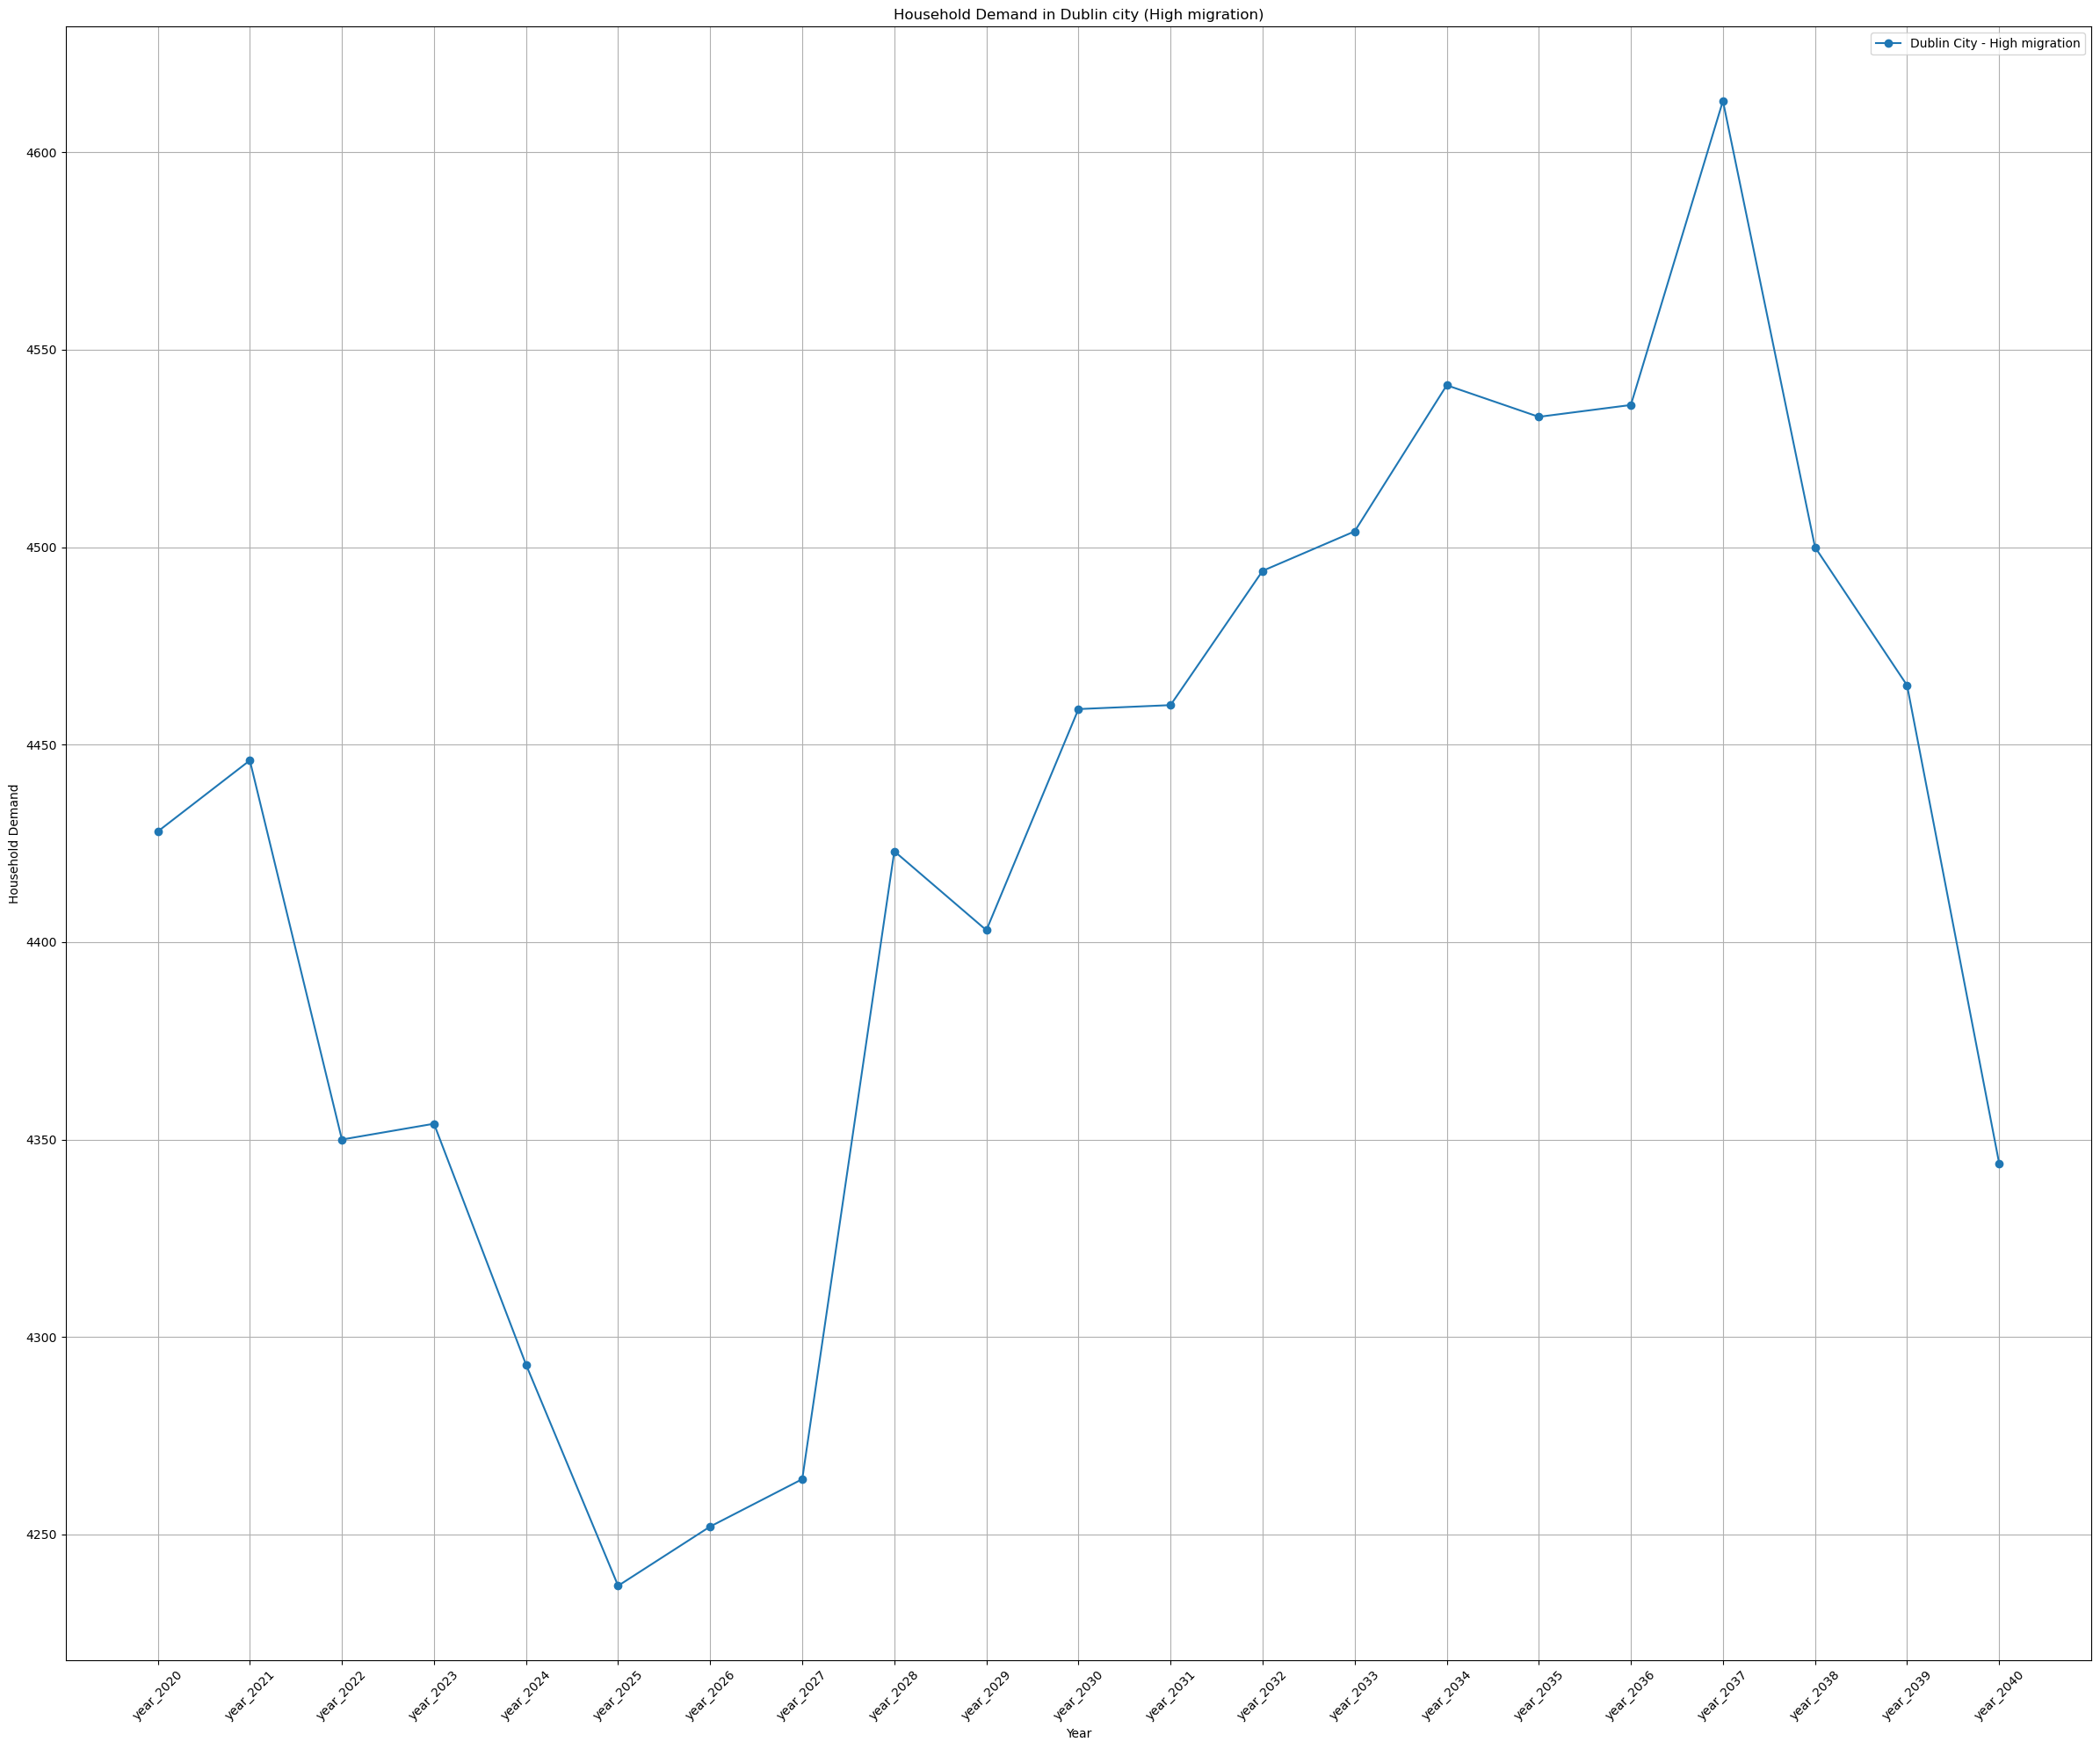

In [ ]:
# Plot the demand for each Dublin City and High migration.
chart_data = data[(data['Local Authority'] == 'Dublin City') & (data['Scenario'] == 'High migration')]

plt.figure(figsize=(24, 20))
plt.plot(columns_to_convert, chart_data[columns_to_convert].iloc[0], marker='o', label='Dublin City - High migration')
plt.title('Household Demand in Dublin City (High migration)')
plt.xlabel('Year')
plt.ylabel('Household Demand')
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()